In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud
import gensim
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM,Bidirectional,Conv1D,MaxPooling1D,Dropout
from sklearn.model_selection import train_test_split
from keras.initializers import Constant
from keras.optimizers import SGD
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
fake=pd.read_csv('fake.csv')

In [54]:
fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [55]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

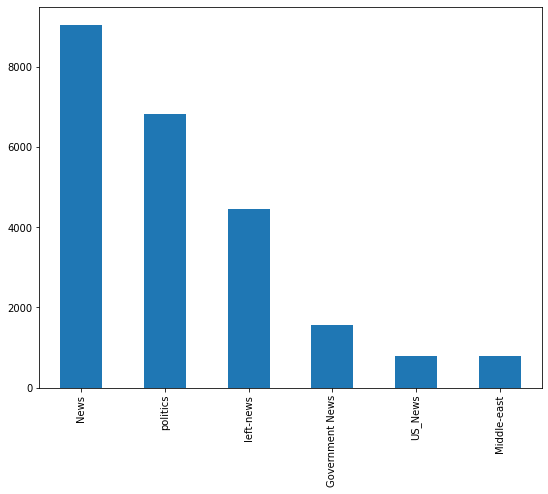

In [56]:
plt.figure(figsize=(9,7))
fake['subject'].value_counts().plot(kind='bar')
plt.show()

In [57]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [58]:
fake.shape

(23481, 4)

In [59]:
fake.isnull().values.any()

False

In [60]:
fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

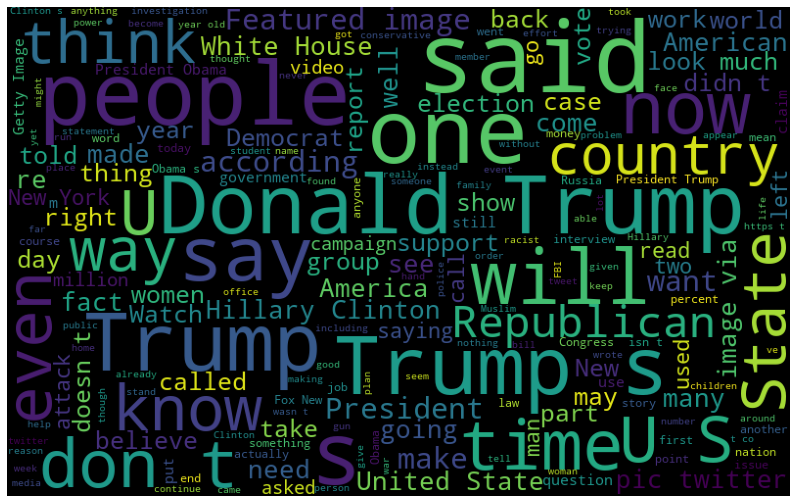

In [61]:
plt.figure(figsize=(15,9))
fake_vis=' '.join([sentence for sentence in fake['text']])
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(fake_vis)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

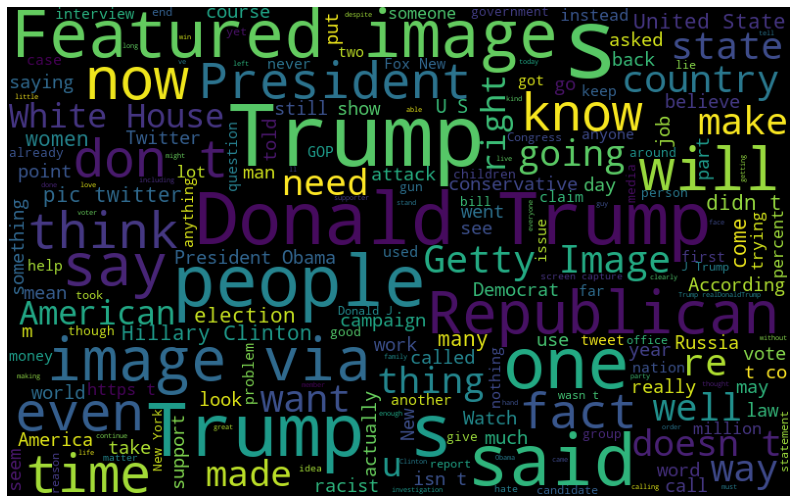

In [62]:
plt.figure(figsize=(15,9))
fake_news_vis=' '.join([sentence for sentence in fake['text'][fake['subject']=='News']])
wordcloud_news=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(fake_news_vis)
plt.imshow(wordcloud_news)
plt.axis('off')
plt.show()

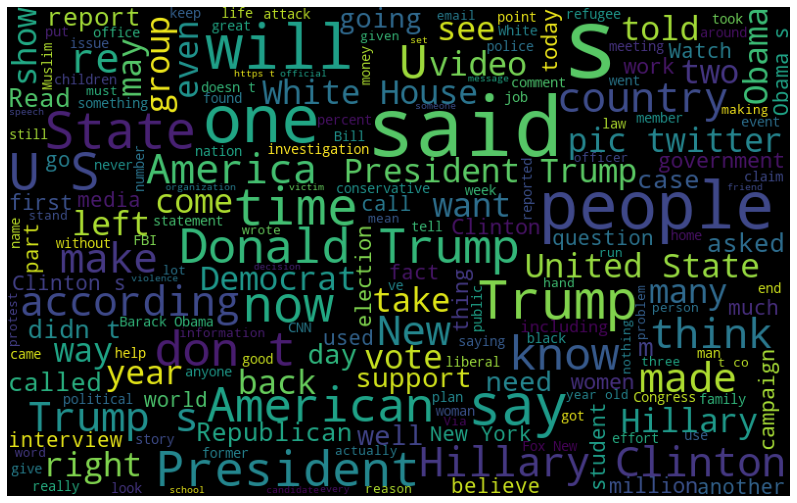

In [63]:
plt.figure(figsize=(15,9))
fake_politics_vis=' '.join([sentence for sentence in fake['text'][fake['subject']=='politics']])
wordcloud_politics=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(fake_politics_vis)
plt.imshow(wordcloud_politics)
plt.axis('off')
plt.show()

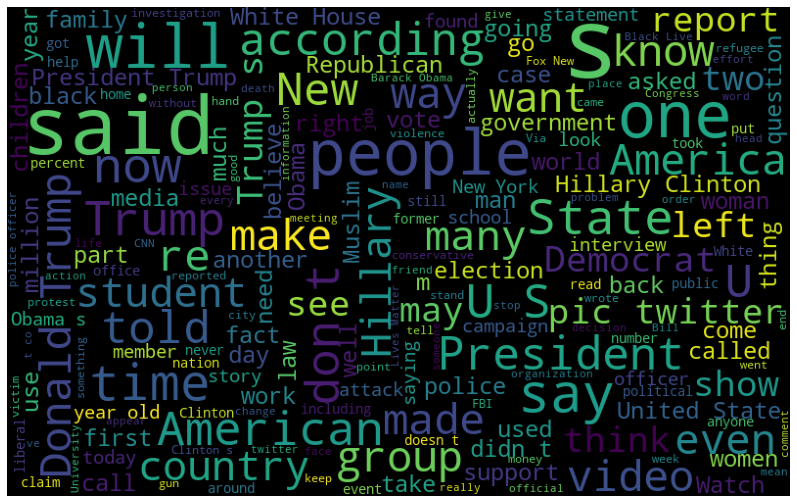

In [64]:
plt.figure(figsize=(15,9))
fake_leftnews_vis=' '.join([sentence for sentence in fake['text'][fake['subject']=='left-news']])
wordcloud_leftnews=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(fake_leftnews_vis)
plt.imshow(wordcloud_leftnews)
plt.axis('off')
plt.show()

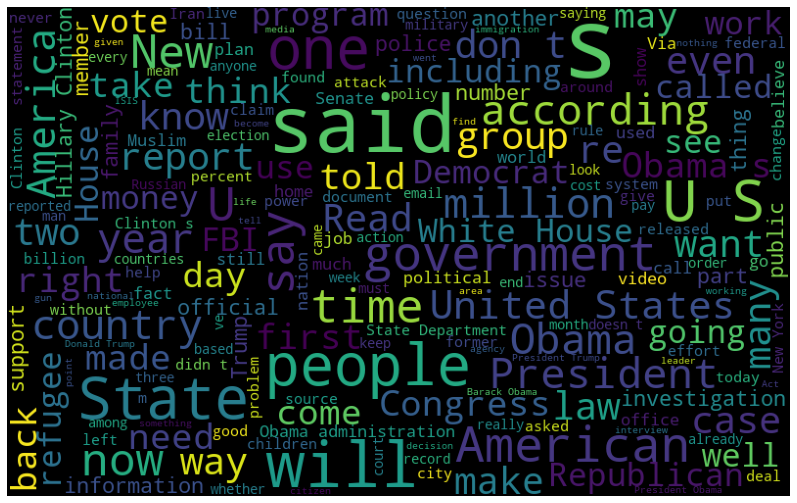

In [65]:
plt.figure(figsize=(15,9))
fake_governmentnews_vis=' '.join([sentence for sentence in fake['text'][fake['subject']=='Government News']])
wordcloud_governmentnews=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(fake_governmentnews_vis)
plt.imshow(wordcloud_governmentnews)
plt.axis('off')
plt.show()

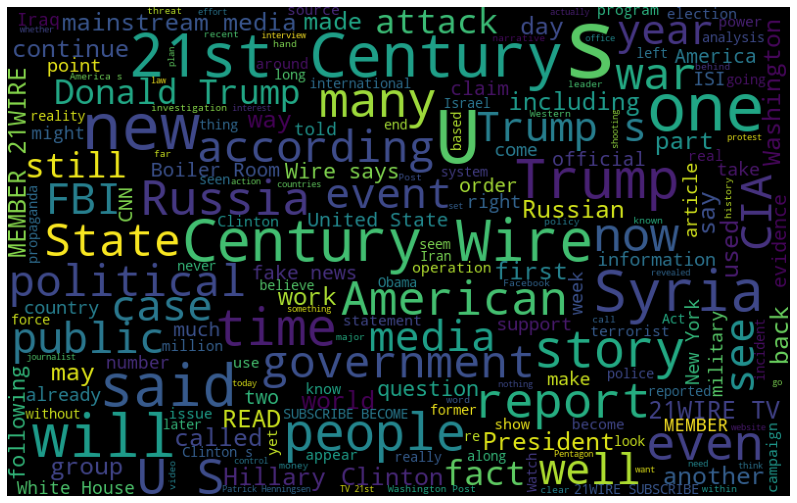

In [66]:
plt.figure(figsize=(15,9))
fake_USnews_vis=' '.join([sentence for sentence in fake['text'][fake['subject']=='US_News']])
wordcloud_USnews=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(fake_USnews_vis)
plt.imshow(wordcloud_USnews)
plt.axis('off')
plt.show()

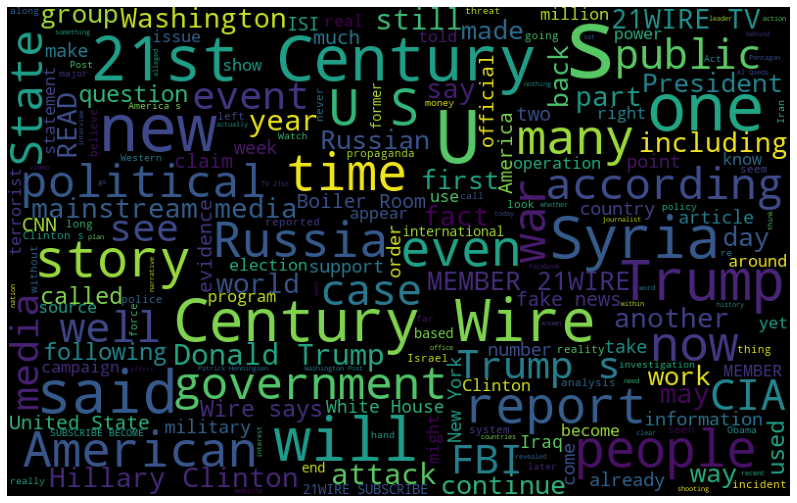

In [67]:
plt.figure(figsize=(15,9))
fake_middleeast_vis=' '.join([sentence for sentence in fake['text'][fake['subject']=='Middle-east']])
wordcloud_middleeast=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(fake_middleeast_vis)
plt.imshow(wordcloud_middleeast)
plt.axis('off')
plt.show()

In [68]:
real=pd.read_csv('True.csv')

In [69]:
real.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [70]:
real.shape

(21417, 4)

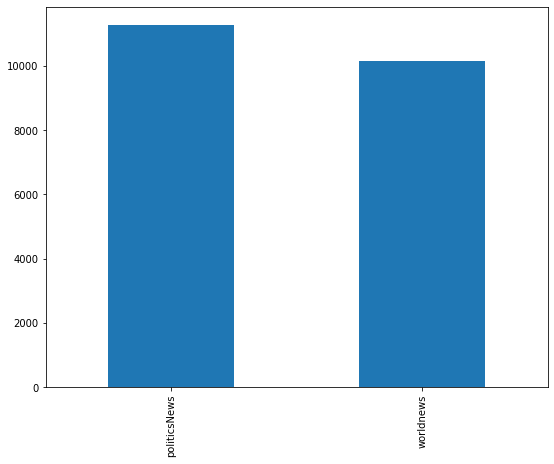

In [71]:
plt.figure(figsize=(9,7))
real['subject'].value_counts().plot(kind='bar')
plt.show()

In [72]:
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [73]:
real.isnull().values.any()

False

In [74]:
real.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

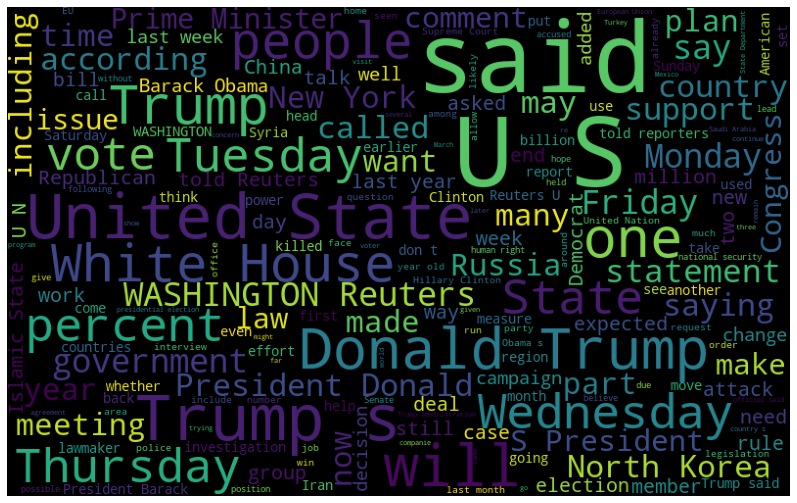

In [75]:
plt.figure(figsize=(15,9))
real_vis=' '.join(real['text'].tolist())
wordcloud_real_vis=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(real_vis)
plt.imshow(wordcloud_real_vis)
plt.axis('off')
plt.show()

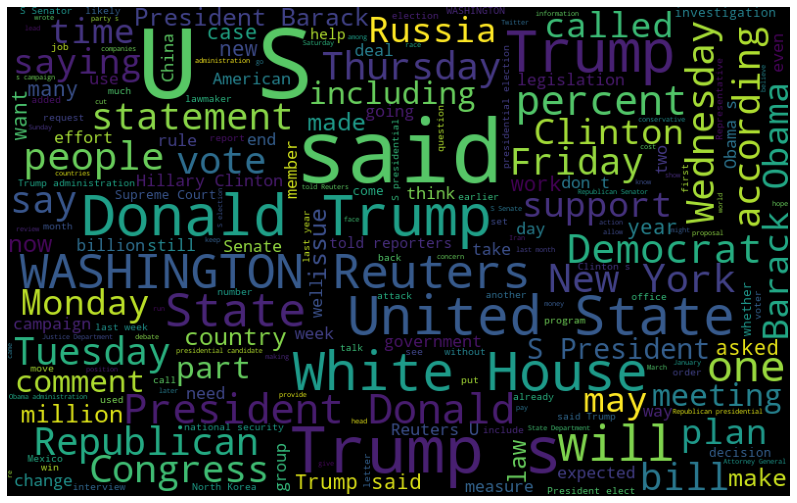

In [76]:
plt.figure(figsize=(15,9))
real_politicsnews_vis=' '.join(real['text'][real['subject']=='politicsNews'].tolist())
wordcloud_politicsnews_vis=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(real_politicsnews_vis)
plt.imshow(wordcloud_politicsnews_vis)
plt.axis('off')
plt.show()

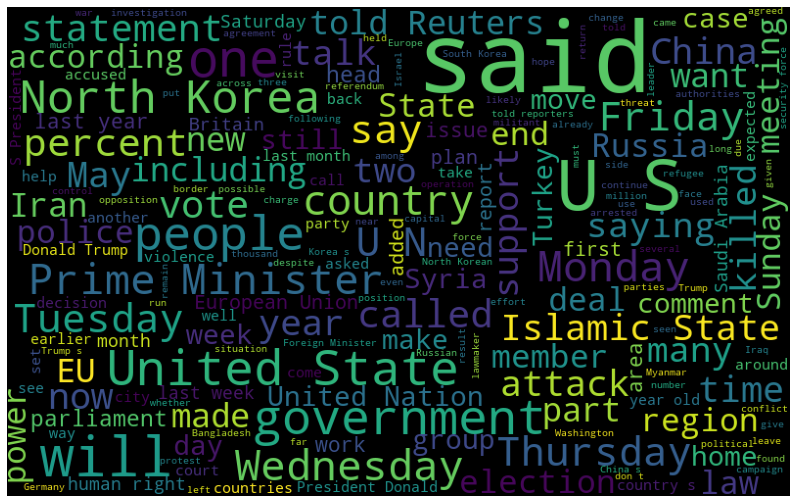

In [77]:
plt.figure(figsize=(15,9))
real_worldnews_vis=' '.join(real['text'][real['subject']=='worldnews'].tolist())
wordcloud_worldnews_vis=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(real_worldnews_vis)
plt.imshow(wordcloud_worldnews_vis)
plt.axis('off')
plt.show()

In [78]:
real.sample(5)

title  \
17263  Iraqi forces take control of all oil fields op...   
8676   White House calls for Malaysian transparency i...   
9340   Supreme Court rejects union appeal over Trump ...   
17595    Juncker says does not want Catalan independence   
10882  New York City budget boss to state: We're not ...   

                                                    text       subject  \
17263  BAGHDAD (Reuters) - Iraqi forces completed an ...     worldnews   
8676   WASHINGTON/KUALA LUMPUR (Reuters) - The White ...  politicsNews   
9340   WASHINGTON (Reuters) - The U.S. Supreme Court ...  politicsNews   
17595  LUXEMBOURG (Reuters) - European Commission Pre...     worldnews   
10882  NEW YORK (Reuters) - New York City’s fiscal wa...  politicsNews   

                     date  
17263   October 17, 2017   
8676       July 21, 2016   
9340        May 31, 2016   
17595   October 13, 2017   
10882  February 10, 2016

In [79]:
unknown_publishers=[]
for index,row in enumerate(real.text.values):
    try:
        record=row.split('-',maxsplit=1)
        record[1]
        assert(len(record[0])<120)
    except:
        unknown_publishers.append(index)

In [80]:
len(unknown_publishers)

222

In [81]:
real.iloc[unknown_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 222, dtype: object

In [82]:
publisher=[]
tmp_text=[]
for index,row in enumerate(real.text.values):
    if index in unknown_publishers:
        tmp_text.append(row)
        publisher.append('Unknown')
    else:
        record=row.split('-',maxsplit=1)
        publisher.append(record[0].strip())
        tmp_text.append(record[1].strip())

In [83]:
real['publisher']=publisher
real['text']=tmp_text

In [84]:
real.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  The head of a conservative Republican faction ...  politicsNews   
1  Transgender people will be allowed for the fir...  politicsNews   
2  The special counsel investigation of links bet...  politicsNews   
3  Trump campaign adviser George Papadopoulos tol...  politicsNews   
4  President Donald Trump called on the U.S. Post...  politicsNews   

                 date                     publisher  
0  December 31, 2017           WASHINGTON (Reuters)  
1  December 29, 2017           WASHINGTON (Reuters)  
2  December 31, 2017           WASHINGTON (Reuters)  
3  December 30, 2017           WASHINGTON (Reuters)  
4  December 29, 2017   SEATTLE/WASHINGTON (Reuters)

In [85]:
empty_fake_index=[index for index,text in enumerate(fake['text'].tolist()) if str(text).strip()=='']

In [86]:
len(empty_fake_index)

630

In [87]:
fake.iloc[empty_fake_index]

title text    subject  \
10923  TAKE OUR POLL: Who Do You Think President Trum...        politics   
11041  Joe Scarborough BERATES Mika Brzezinski Over “...        politics   
11190  WATCH TUCKER CARLSON Scorch Sanctuary City May...        politics   
11225  MAYOR OF SANCTUARY CITY: Trump Trying To Make ...        politics   
11236  SHOCKER: Public School Turns Computer Lab Into...        politics   
...                                                  ...  ...        ...   
21816  BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...       left-news   
21826  FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...       left-news   
21827  (VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...       left-news   
21857  (VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...       left-news   
21873  (VIDEO) HYSTERICAL SNL TAKE ON HILLARY’S ANNOU...       left-news   

               date  
10923  May 10, 2017  
11041  Apr 26, 2017  
11190   Apr 6, 2017  
11225   Apr 2, 2017  
11236   Apr 1, 2017  
...             ...  
21816  Apr 27, 2015  
21826  Apr 25, 2015  
21827  Apr 25, 2015  
21857  Apr 14, 2015  
21873  Apr 12, 2015  

[630 rows x 4 columns]

In [88]:
real['text']=real['title']+' '+real['text']
fake['text']=fake['title']+' '+fake['text']

In [89]:
real['text']=real['text'].apply(lambda x:str(x).lower())
fake['text']=fake['text'].apply(lambda x:str(x).lower())

In [90]:
real['class']=1
fake['class']=0

In [91]:
real.columns

Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')

In [92]:
fake.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [93]:
real=real[['text','class']]
fake=fake[['text','class']]

In [94]:
real.head()

text  class
0  as u.s. budget fight looms, republicans flip t...      1
1  u.s. military to accept transgender recruits o...      1
2  senior u.s. republican senator: 'let mr. muell...      1
3  fbi russia probe helped by australian diplomat...      1
4  trump wants postal service to charge 'much mor...      1

In [95]:
fake.head()

text  class
0   donald trump sends out embarrassing new year’...      0
1   drunk bragging trump staffer started russian ...      0
2   sheriff david clarke becomes an internet joke...      0
3   trump is so obsessed he even has obama’s name...      0
4   pope francis just called out donald trump dur...      0

In [96]:
data=real.append(fake,ignore_index=True)

C:\Users\power\AppData\Local\Temp\ipykernel_2640\1598362680.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=real.append(fake,ignore_index=True)


In [97]:
data.sample(5)

text  class
21200  iraqi prime minister declares victory over is ...      1
40379  nuclear showdown? navy seal team that killed o...      0
23600   watch: ivanka trump gets skewered by saturday...      0
4701   healthcare bill has been pulled: house republi...      1
30655  “never-trump” busted! former jeb bush staffer ...      0

In [98]:
data.shape

(44898, 2)

In [99]:
def html_tag(text):
    TAG_RE=re.compile('[<>^+]')
    return TAG_RE.sub('',text)

In [100]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\power\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [101]:
def preprocess_text(sen):
    sentence=html_tag(sen)
    sentence=re.sub('[^A-Za-z]',' ',sentence)
    sentence=re.sub(r'\s+[A-Za-z]\s+',' ',sentence)
    sentence=re.sub(r'\s+',' ',sentence)
    pattern=re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    sentence=pattern.sub('',sentence)
    return sentence

In [102]:
X=[]
sentence=list(data['text'])
for sen in sentence:
    X.append(preprocess_text(sen))

In [103]:
X[1]

'u military accept transgender recruits monday pentagon transgender people allowed first time enlist military starting monday ordered federal courts pentagon said friday president donald trump administration decided appeal rulings blocked transgender ban two federal appeals courts one washington one virginia last week rejected administration request put hold orders lower court judges requiring military begin accepting transgender recruits jan justice department official said administration challenge rulings department defense announced releasing independent study issues coming weeks rather litigate interim appeal occurs administration decided wait dod study continue defend president lawful authority district court meantime official said speaking condition anonymity september pentagon said created panel senior officials study implement directive trump prohibit transgender individuals serving defense department feb submit plan trump lawyers representing currently serving transgender serv

In [104]:
len(X)

44898

In [105]:
y=data['class'].values

In [106]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [107]:
y.shape

(44898,)

In [108]:
X_split=[d.split() for d in X]

In [109]:
X_split[0]

['budget',
 'fight',
 'looms',
 'republicans',
 'flip',
 'fiscal',
 'script',
 'head',
 'conservative',
 'republican',
 'faction',
 'congress',
 'voted',
 'month',
 'huge',
 'expansion',
 'national',
 'debt',
 'pay',
 'tax',
 'cuts',
 'called',
 'fiscal',
 'conservative',
 'sunday',
 'urged',
 'budget',
 'restraint',
 'keeping',
 'sharp',
 'pivot',
 'way',
 'among',
 'republicans',
 'representative',
 'mark',
 'meadows',
 'speaking',
 'cbs',
 'face',
 'nation',
 'drew',
 'hard',
 'line',
 'federal',
 'spending',
 'lawmakers',
 'bracing',
 'battle',
 'january',
 'return',
 'holidays',
 'wednesday',
 'lawmakers',
 'begin',
 'trying',
 'pass',
 'federal',
 'budget',
 'fight',
 'likely',
 'linked',
 'issues',
 'immigration',
 'policy',
 'even',
 'november',
 'congressional',
 'election',
 'campaigns',
 'approach',
 'republicans',
 'seek',
 'keep',
 'control',
 'congress',
 'president',
 'donald',
 'trump',
 'republicans',
 'want',
 'big',
 'budget',
 'increase',
 'military',
 'spending',
 

In [110]:
type(X_split[0])

list

In [111]:
DIM=100
w2v_model=gensim.models.Word2Vec(sentences=X_split,window=10,min_count=1,vector_size=DIM)

In [112]:
w2v_model.wv.vectors

array([[-2.0016878e+00, -3.2902884e+00,  3.8095262e+00, ...,
         2.8439648e+00,  9.8371124e-01,  1.9587459e-01],
       [ 1.1457535e+00,  6.1556411e-01, -2.9325960e+00, ...,
        -3.0455977e-01, -4.3282671e+00, -3.7986350e-01],
       [ 5.7855022e-01, -2.5461001e+00, -1.0049939e+00, ...,
         1.4456078e+00,  3.0592306e+00, -1.7740090e+00],
       ...,
       [-6.4771273e-04, -6.0749794e-03,  1.1217056e-02, ...,
         4.8946654e-03, -4.9570266e-02, -6.3733058e-03],
       [-6.0562934e-03, -2.2927602e-03,  1.2732790e-02, ...,
         5.6610457e-03,  2.7525747e-02, -1.1246360e-03],
       [-4.8243287e-03,  1.2866355e-02,  2.3018463e-02, ...,
        -7.0476159e-04, -1.3728942e-02, -1.0907078e-02]], dtype=float32)

In [113]:
len(w2v_model.wv.vectors)

115755

In [114]:
len(w2v_model.wv.vectors[0])

100

In [115]:
w2v_model.wv.vectors[0]

array([-2.0016878 , -3.2902884 ,  3.8095262 , -0.5522599 , -4.308403  ,
        1.3335164 ,  1.3029033 , -0.41116235,  0.38557655, -1.22338   ,
        5.098537  ,  0.26007953,  1.118691  , -0.6089971 ,  2.772327  ,
       -3.872224  ,  0.4960531 ,  3.8603735 , -0.6564563 ,  1.6787685 ,
        0.99426806, -1.4193574 , -3.2446373 ,  2.1006088 , -1.5138099 ,
       -0.38674283,  0.6379693 ,  1.4429305 , -1.8611157 ,  0.8045765 ,
       -2.2801929 , -2.4549165 ,  2.055198  , -2.4446416 , -0.1324736 ,
       -1.9222864 , -0.01140251, -1.0688583 , -1.0028489 ,  0.5029341 ,
       -2.9808304 ,  2.490669  , -1.1853683 ,  0.77973473,  1.123738  ,
       -0.17069075,  4.5500617 ,  2.0428195 , -2.1889377 , -0.07499703,
       -1.5517001 ,  0.5043791 , -2.4757435 ,  1.3879049 ,  4.665131  ,
        1.1123819 ,  1.7490584 , -2.3170762 , -0.87769103,  2.7199042 ,
       -0.97815216,  0.2758148 ,  3.0273497 ,  0.03370405,  2.5624588 ,
        0.4840032 ,  0.659718  , -0.6371904 , -1.054018  , -0.20

In [116]:
w2v_model.wv['good']

array([-1.76188838e+00,  2.48034382e+00,  1.59818459e+00,  5.58426261e-01,
       -3.46216321e+00,  3.84315300e+00,  1.74307203e+00, -2.21990490e+00,
        2.61080265e+00, -2.58730197e+00,  2.53209853e+00, -9.64393258e-01,
       -1.04497266e+00,  2.07595062e+00,  2.15432763e+00, -1.69668961e+00,
        3.54336321e-01,  6.35674238e-01, -2.01934004e+00,  1.99466541e-01,
        3.34408021e+00, -3.32546830e-01, -4.16004944e+00,  3.96682906e+00,
       -2.36257806e-01,  5.89650333e-01, -1.70531428e+00, -1.67593443e+00,
        3.68993938e-01, -2.12424922e+00, -5.03282213e+00, -8.98357868e-01,
        2.17612720e+00, -3.03485513e-01,  3.06809664e+00,  1.60586882e+00,
       -7.63568699e-01,  1.17641175e+00,  8.29864204e-01,  8.87161016e-01,
       -3.78549337e+00,  1.75478566e+00, -9.76710916e-01,  6.40070975e-01,
       -1.28347063e+00,  1.10354424e+00, -5.28223393e-03, -2.98265994e-01,
        2.27191418e-01,  2.13092834e-01,  2.48130631e+00,  1.17945945e+00,
        2.21746349e+00, -

In [117]:
len(w2v_model.wv['good'])

100

In [118]:
w2v_model.wv['great']

array([-0.02337357, -0.85397696, -0.435038  ,  0.26206824, -0.8926314 ,
        4.318205  ,  1.2978601 , -1.282788  ,  1.3994772 , -2.309706  ,
        4.6420517 , -2.8869138 ,  0.40206492,  0.31556818,  1.2129083 ,
       -4.8075233 ,  0.1949463 , -0.3331517 , -3.2795143 , -1.7075661 ,
        1.8287005 , -0.2990432 , -2.4477508 ,  3.713348  ,  0.6583769 ,
        0.13752237, -0.43206936,  2.0356796 , -0.33043212,  0.22277547,
       -4.088222  ,  0.3408262 , -1.3240938 , -1.8202728 ,  2.5913029 ,
       -0.25403887,  1.4689488 , -0.5659964 , -0.5466414 ,  2.158818  ,
       -4.5415654 ,  2.5559657 , -2.7467012 , -0.3379643 , -1.7424865 ,
        0.25053066,  1.1036383 , -1.0612026 ,  0.05640377, -1.7762957 ,
        2.521175  , -1.6000477 ,  2.9998066 , -2.527002  ,  1.869134  ,
       -2.2549248 , -0.6799297 ,  2.8462622 , -1.8785005 ,  2.3844728 ,
       -2.710795  , -1.4628477 , -1.2859507 , -3.007429  , -0.96727693,
        0.5626831 ,  3.4650605 ,  2.0208457 , -0.71742713, -0.47

In [119]:
w2v_model.wv.most_similar('great')

[('good', 0.7150089740753174),
 ('wonderful', 0.6563811898231506),
 ('proud', 0.621261715888977),
 ('best', 0.6103025078773499),
 ('love', 0.5973994731903076),
 ('amazing', 0.577837347984314),
 ('greatest', 0.5517287254333496),
 ('happy', 0.5342075824737549),
 ('better', 0.5336765050888062),
 ('fantastic', 0.5293735265731812)]

In [120]:
w2v_model.wv.most_similar('phone')

[('telephone', 0.7316675186157227),
 ('phones', 0.5911939144134521),
 ('cell', 0.5695998668670654),
 ('recording', 0.5171722173690796),
 ('mobile', 0.5122765302658081),
 ('protestpp', 0.49847933650016785),
 ('comor', 0.49719318747520447),
 ('contact', 0.4716157019138336),
 ('chat', 0.4589870274066925),
 ('conversation', 0.45786842703819275)]

In [121]:
w2v_model.wv.similarity(w1='hat',w2='dress')

0.5781964

In [122]:
w2v_model.wv.similarity(w1='hat',w2='phone')

0.09538247

In [123]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X)

In [124]:
X_sequences=tokenizer.texts_to_sequences(X)

In [125]:
X_sequences[0]

[384,
 390,
 10302,
 54,
 5415,
 1252,
 4767,
 312,
 203,
 16,
 6088,
 100,
 686,
 159,
 1004,
 2806,
 48,
 811,
 344,
 93,
 1073,
 72,
 1252,
 203,
 239,
 1015,
 384,
 7403,
 1617,
 3167,
 7641,
 75,
 229,
 54,
 701,
 773,
 7380,
 506,
 1692,
 328,
 218,
 1632,
 409,
 444,
 88,
 591,
 318,
 16442,
 1211,
 313,
 649,
 7706,
 110,
 318,
 1301,
 271,
 759,
 88,
 384,
 390,
 221,
 1526,
 335,
 209,
 113,
 34,
 381,
 479,
 25,
 1892,
 1383,
 54,
 993,
 290,
 242,
 100,
 3,
 13,
 1,
 54,
 94,
 281,
 384,
 860,
 85,
 591,
 106,
 10,
 94,
 11770,
 3400,
 611,
 262,
 12500,
 591,
 888,
 71,
 861,
 3967,
 975,
 1317,
 84,
 212,
 1258,
 1087,
 1,
 62,
 202,
 1231,
 46,
 60,
 860,
 611,
 262,
 12500,
 591,
 58,
 7380,
 482,
 630,
 3318,
 12,
 670,
 1959,
 2,
 232,
 106,
 95,
 362,
 135,
 299,
 14,
 344,
 1178,
 58,
 1252,
 203,
 97,
 10766,
 1774,
 286,
 5,
 169,
 2,
 7380,
 229,
 54,
 686,
 498,
 513,
 28,
 811,
 6974,
 93,
 2151,
 355,
 10534,
 88,
 384,
 2140,
 1886,
 2150,
 38,
 2150,
 48,
 8

In [126]:
print(len(X_sequences))

44898


In [127]:
tokenizer.word_index

{'trump': 1,
 'said': 2,
 'president': 3,
 'would': 4,
 'people': 5,
 'one': 6,
 'state': 7,
 'new': 8,
 'obama': 9,
 'also': 10,
 'clinton': 11,
 'house': 12,
 'donald': 13,
 'government': 14,
 'states': 15,
 'republican': 16,
 'year': 17,
 'white': 18,
 'could': 19,
 'told': 20,
 'united': 21,
 'like': 22,
 'campaign': 23,
 'two': 24,
 'election': 25,
 'news': 26,
 'time': 27,
 'party': 28,
 'last': 29,
 'first': 30,
 'hillary': 31,
 'former': 32,
 'country': 33,
 'even': 34,
 'us': 35,
 'video': 36,
 'media': 37,
 'years': 38,
 'many': 39,
 'american': 40,
 'security': 41,
 'law': 42,
 'may': 43,
 'police': 44,
 'court': 45,
 'say': 46,
 'made': 47,
 'national': 48,
 'political': 49,
 'get': 50,
 'russia': 51,
 'right': 52,
 'make': 53,
 'republicans': 54,
 'twitter': 55,
 'since': 56,
 'bill': 57,
 'percent': 58,
 'back': 59,
 'going': 60,
 'america': 61,
 'administration': 62,
 'according': 63,
 'presidential': 64,
 'says': 65,
 'senate': 66,
 'vote': 67,
 'week': 68,
 'north': 69

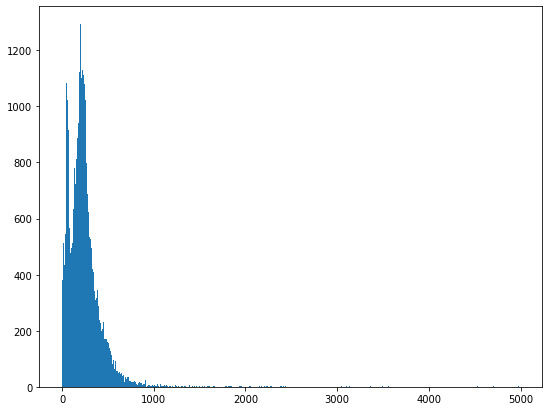

In [128]:
plt.figure(figsize=(9,7))
plt.hist([len(x) for x in X_sequences],bins=700)
plt.show()

In [129]:
nos=np.array([len(x) for x in X_sequences])

In [130]:
print(max(nos))

4980


In [131]:
maxlen=1000
X_sequences=pad_sequences(X_sequences,maxlen=maxlen,padding='post')

In [132]:
X_sequences[0]

array([  384,   390, 10302,    54,  5415,  1252,  4767,   312,   203,
          16,  6088,   100,   686,   159,  1004,  2806,    48,   811,
         344,    93,  1073,    72,  1252,   203,   239,  1015,   384,
        7403,  1617,  3167,  7641,    75,   229,    54,   701,   773,
        7380,   506,  1692,   328,   218,  1632,   409,   444,    88,
         591,   318, 16442,  1211,   313,   649,  7706,   110,   318,
        1301,   271,   759,    88,   384,   390,   221,  1526,   335,
         209,   113,    34,   381,   479,    25,  1892,  1383,    54,
         993,   290,   242,   100,     3,    13,     1,    54,    94,
         281,   384,   860,    85,   591,   106,    10,    94, 11770,
        3400,   611,   262, 12500,   591,   888,    71,   861,  3967,
         975,  1317,    84,   212,  1258,  1087,     1,    62,   202,
        1231,    46,    60,   860,   611,   262, 12500,   591,    58,
        7380,   482,   630,  3318,    12,   670,  1959,     2,   232,
         106,    95,

In [133]:
len(X_sequences[0])

1000

In [134]:
vocab_size=len(tokenizer.word_index)+1
vocab=tokenizer.word_index

In [135]:
def get_weight_matrix(model):
    weight_matrix=np.zeros((vocab_size,DIM))
    for word,i in vocab.items():
        weight_matrix[i]=model.wv[word]
        return weight_matrix

In [136]:
embedding_vectors=get_weight_matrix(w2v_model)

In [137]:
embedding_vectors[1]

array([-2.00168777, -3.29028845,  3.80952621, -0.55225992, -4.30840302,
        1.33351636,  1.30290329, -0.41116235,  0.38557655, -1.22337997,
        5.09853697,  0.26007953,  1.11869097, -0.60899711,  2.77232695,
       -3.87222409,  0.4960531 ,  3.8603735 , -0.65645629,  1.67876852,
        0.99426806, -1.41935742, -3.24463725,  2.10060883, -1.51380992,
       -0.38674283,  0.63796932,  1.44293046, -1.86111569,  0.80457652,
       -2.28019285, -2.45491648,  2.05519795, -2.44464159, -0.1324736 ,
       -1.92228639, -0.01140251, -1.06885827, -1.00284886,  0.5029341 ,
       -2.98083043,  2.49066901, -1.1853683 ,  0.77973473,  1.12373805,
       -0.17069075,  4.5500617 ,  2.0428195 , -2.18893766, -0.07499703,
       -1.55170012,  0.50437909, -2.47574353,  1.38790488,  4.66513109,
        1.11238194,  1.74905837, -2.31707621, -0.87769103,  2.71990418,
       -0.97815216,  0.2758148 ,  3.02734971,  0.03370405,  2.56245875,
        0.48400319,  0.65971798, -0.6371904 , -1.05401802, -0.20

In [138]:
embedding_vectors.shape

(115756, 100)

In [139]:
len(tokenizer.word_index)

115755

In [142]:
epochs=6
learning_rate=0.1
decay_rate=learning_rate/epochs
momentum=0.8
sgd=SGD(learning_rate=learning_rate,momentum=momentum,decay=decay_rate,nesterov=False)
model=Sequential()
model.add(Embedding(vocab_size,output_dim=DIM,embeddings_initializer=Constant(embedding_vectors),trainable=False))
model.add(Conv1D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(1,activation='sigmoid'))

C:\Users\power\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\optimizers\base_optimizer.py:34: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [143]:
model.compile(optimizer=sgd,
              loss='binary_crossentropy',
              metrics=['accuracy']
)

In [144]:
len(X_sequences)

44898

In [145]:
len(y)

44898

In [146]:
X_train,X_test,y_train,y_test=train_test_split(X_sequences,y,stratify=y)

In [147]:
X_train.shape

(33673, 1000)

In [148]:
X_test.shape

(11225, 1000)

In [149]:
hist=model.fit(X_train,y_train,epochs=epochs,validation_split=0.3,batch_size=64,verbose=1)

Epoch 1/6
369/369 ━━━━━━━━━━━━━━━━━━━━ 195s 396ms/step - accuracy: 0.5713 - loss: 0.6669 - val_accuracy: 0.9200 - val_loss: 0.2039
Epoch 2/6
369/369 ━━━━━━━━━━━━━━━━━━━━ 149s 403ms/step - accuracy: 0.9443 - loss: 0.1560 - val_accuracy: 0.9636 - val_loss: 0.1002
Epoch 3/6
369/369 ━━━━━━━━━━━━━━━━━━━━ 150s 406ms/step - accuracy: 0.9768 - loss: 0.0682 - val_accuracy: 0.9740 - val_loss: 0.0760
Epoch 4/6
369/369 ━━━━━━━━━━━━━━━━━━━━ 150s 408ms/step - accuracy: 0.9895 - loss: 0.0342 - val_accuracy: 0.9775 - val_loss: 0.0669
Epoch 5/6
369/369 ━━━━━━━━━━━━━━━━━━━━ 150s 406ms/step - accuracy: 0.9916 - loss: 0.0264 - val_accuracy: 0.9782 - val_loss: 0.0734
Epoch 6/6
369/369 ━━━━━━━━━━━━━━━━━━━━ 150s 407ms/step - accuracy: 0.9964 - loss: 0.0128 - val_accuracy: 0.9698 - val_loss: 0.1107


In [150]:
model.evaluate(X_test,y_test)

351/351 ━━━━━━━━━━━━━━━━━━━━ 22s 63ms/step - accuracy: 0.9694 - loss: 0.1125


[0.10659308731555939, 0.9701558947563171]

In [158]:
y_predicted=model.predict(X_test)

351/351 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step


In [159]:
y_predicted

array([[9.9829763e-01],
       [8.4871484e-05],
       [7.9202451e-05],
       ...,
       [9.9346107e-01],
       [2.8804454e-04],
       [9.9986827e-01]], dtype=float32)

In [160]:
y_pred=np.where(y_predicted>0.5,1,0)

In [161]:
y_pred

array([[1],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]])

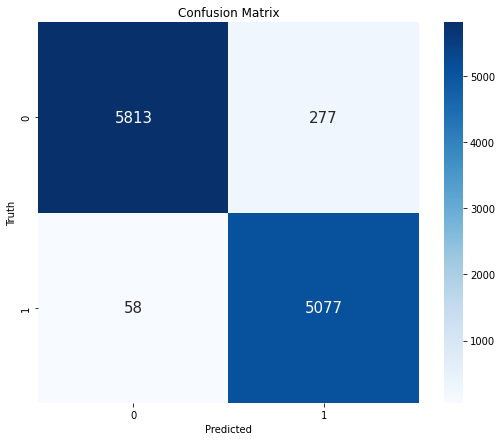

In [165]:
cm=confusion_matrix(y_pred,y_test)
plt.figure(figsize=(9,7))
sns.heatmap(cm,annot=True,square=True,cbar=True,annot_kws={'size':15},fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [166]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      6090
           1       0.95      0.99      0.97      5135

    accuracy                           0.97     11225
   macro avg       0.97      0.97      0.97     11225
weighted avg       0.97      0.97      0.97     11225



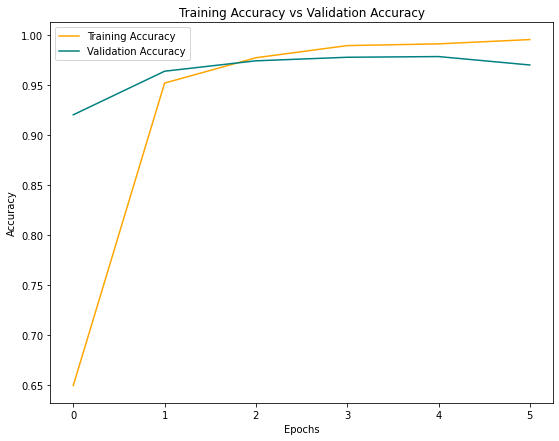

In [168]:
plt.figure(figsize=(9,7))
plt.plot(hist.history['accuracy'],color='orange',label='Training Accuracy')
plt.plot(hist.history['val_accuracy'],color='teal',label='Validation Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

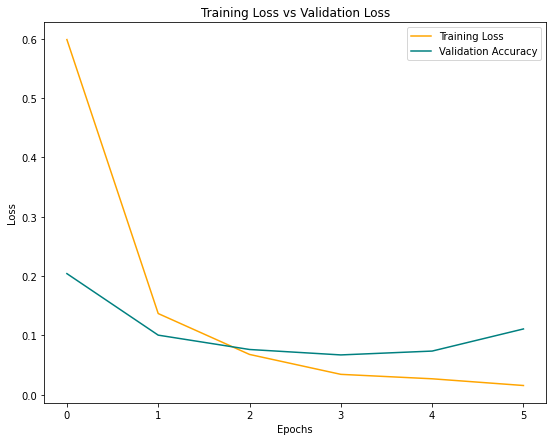

In [169]:
plt.figure(figsize=(9,7))
plt.plot(hist.history['loss'],color='orange',label='Training Loss')
plt.plot(hist.history['val_loss'],color='teal',label='Validation Accuracy')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()